# SSC Data Science and Analytics Workshop 2021

## The Data Scientist’s Workflow: EDA and Statistical Modeling with Python in Jupyter Notebooks

# Statistical Modeling (Nathaniel)

## Ordinary Linear Regression

- Preliminary Exploration
    - Plots and summary statistics
    
- Simple Linear Regression
    - Model Fitting
    - Residual Diagnostics
    - Influence Analysis

- Multiple Linear Regression
   - Model Fitting 
   - Multicollinearity
   - Residual Diagnostics
   - Prediction
   
## Logistic Regression

- Preliminary Exploration
- Model Fitting
- Classification

We begin by importing the necessary libraries. The need for each of these will be made clear below.

In [561]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std as pi
from statsmodels.stats.outliers_influence import summary_table
from statsmodels.graphics.mosaicplot import mosaic
import scipy.stats as stats
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve 

# Ordinary Linear Regression

![caption](files/boston.png)

In this section we're going to be analyzing the infamous Boston housing dataset. 
This dataset records the median house value and several other variables for 506 neighborhoods around Boston in 1978. Specifically, the dataset contains observations for each of the following variables:
* `crim`: per capita crime rate
* `zn`: proportion of residential land zoned for lots over 25,000 sq. ft.
* `indus`: proportion of non-retail business acreage
* `chas`: dummy variable indicating whether the neighborhood is adjacent to the Charles River (1) or not (0)
* `nox`: nitrogen oxide pollution concentration (parts per 10 million)
* `rm`: average number of rooms per house
* `age`: proportion of owner-occupied houses built prior to 1940
* `dis`: weighted mean of distance to five Boston employment centers
* `rad`: index of accessibility to radial highways
* `tax`: property tax rate per \$10,000
* `ptratio`: pupil-teacher ratio
* `lstat`: percent of population that have a “low” socioeconomic status
* `medv`: median value of owner-occupied houses in $1000s

Here we assume interest lies in understanding which factors influence the value of a house – and how they influence the value of a house. Interest also lies in predicting the value of a house in a neighborhood with specific traits.

## Preliminary exploration
We'll begin by reading in the data, and saving the dataframe in a variable called `house`.

In [562]:
house = pd.read_csv('boston.csv')

Let's look at the first 10 rows to see wait we're dealing with. We'll do this with the `head` function from the `pandas` library.

In [563]:
house.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,17.10,18.9


Let's also look at the bottom 10 rows to make sure nothing strange is hidden down there. We'll do this with the `tail` function from the `pandas` library.

In [564]:
house.tail(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
496,0.28960,0.0,9.69,0,0.585,5.390,72.9,2.7986,6,391,19.2,21.14,19.7
497,0.26838,0.0,9.69,0,0.585,5.794,70.6,2.8927,6,391,19.2,14.10,18.3
498,0.23912,0.0,9.69,0,0.585,6.019,65.3,2.4091,6,391,19.2,12.92,21.2
499,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,15.10,17.5
500,0.22438,0.0,9.69,0,0.585,6.027,79.7,2.4982,6,391,19.2,14.33,16.8
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,7.88,11.9


Let's next look at some summary statistics for each variable in the dataset. We'll do this with the `describe` function from the `pandas` library.

In [565]:
house.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


We'll next visualize each of these variables and their pairwise relationships using the `pairplot` function from the `seaborn` library. Let's also calculate all pairwise correlations using the `corr` function from the `pandas` library.

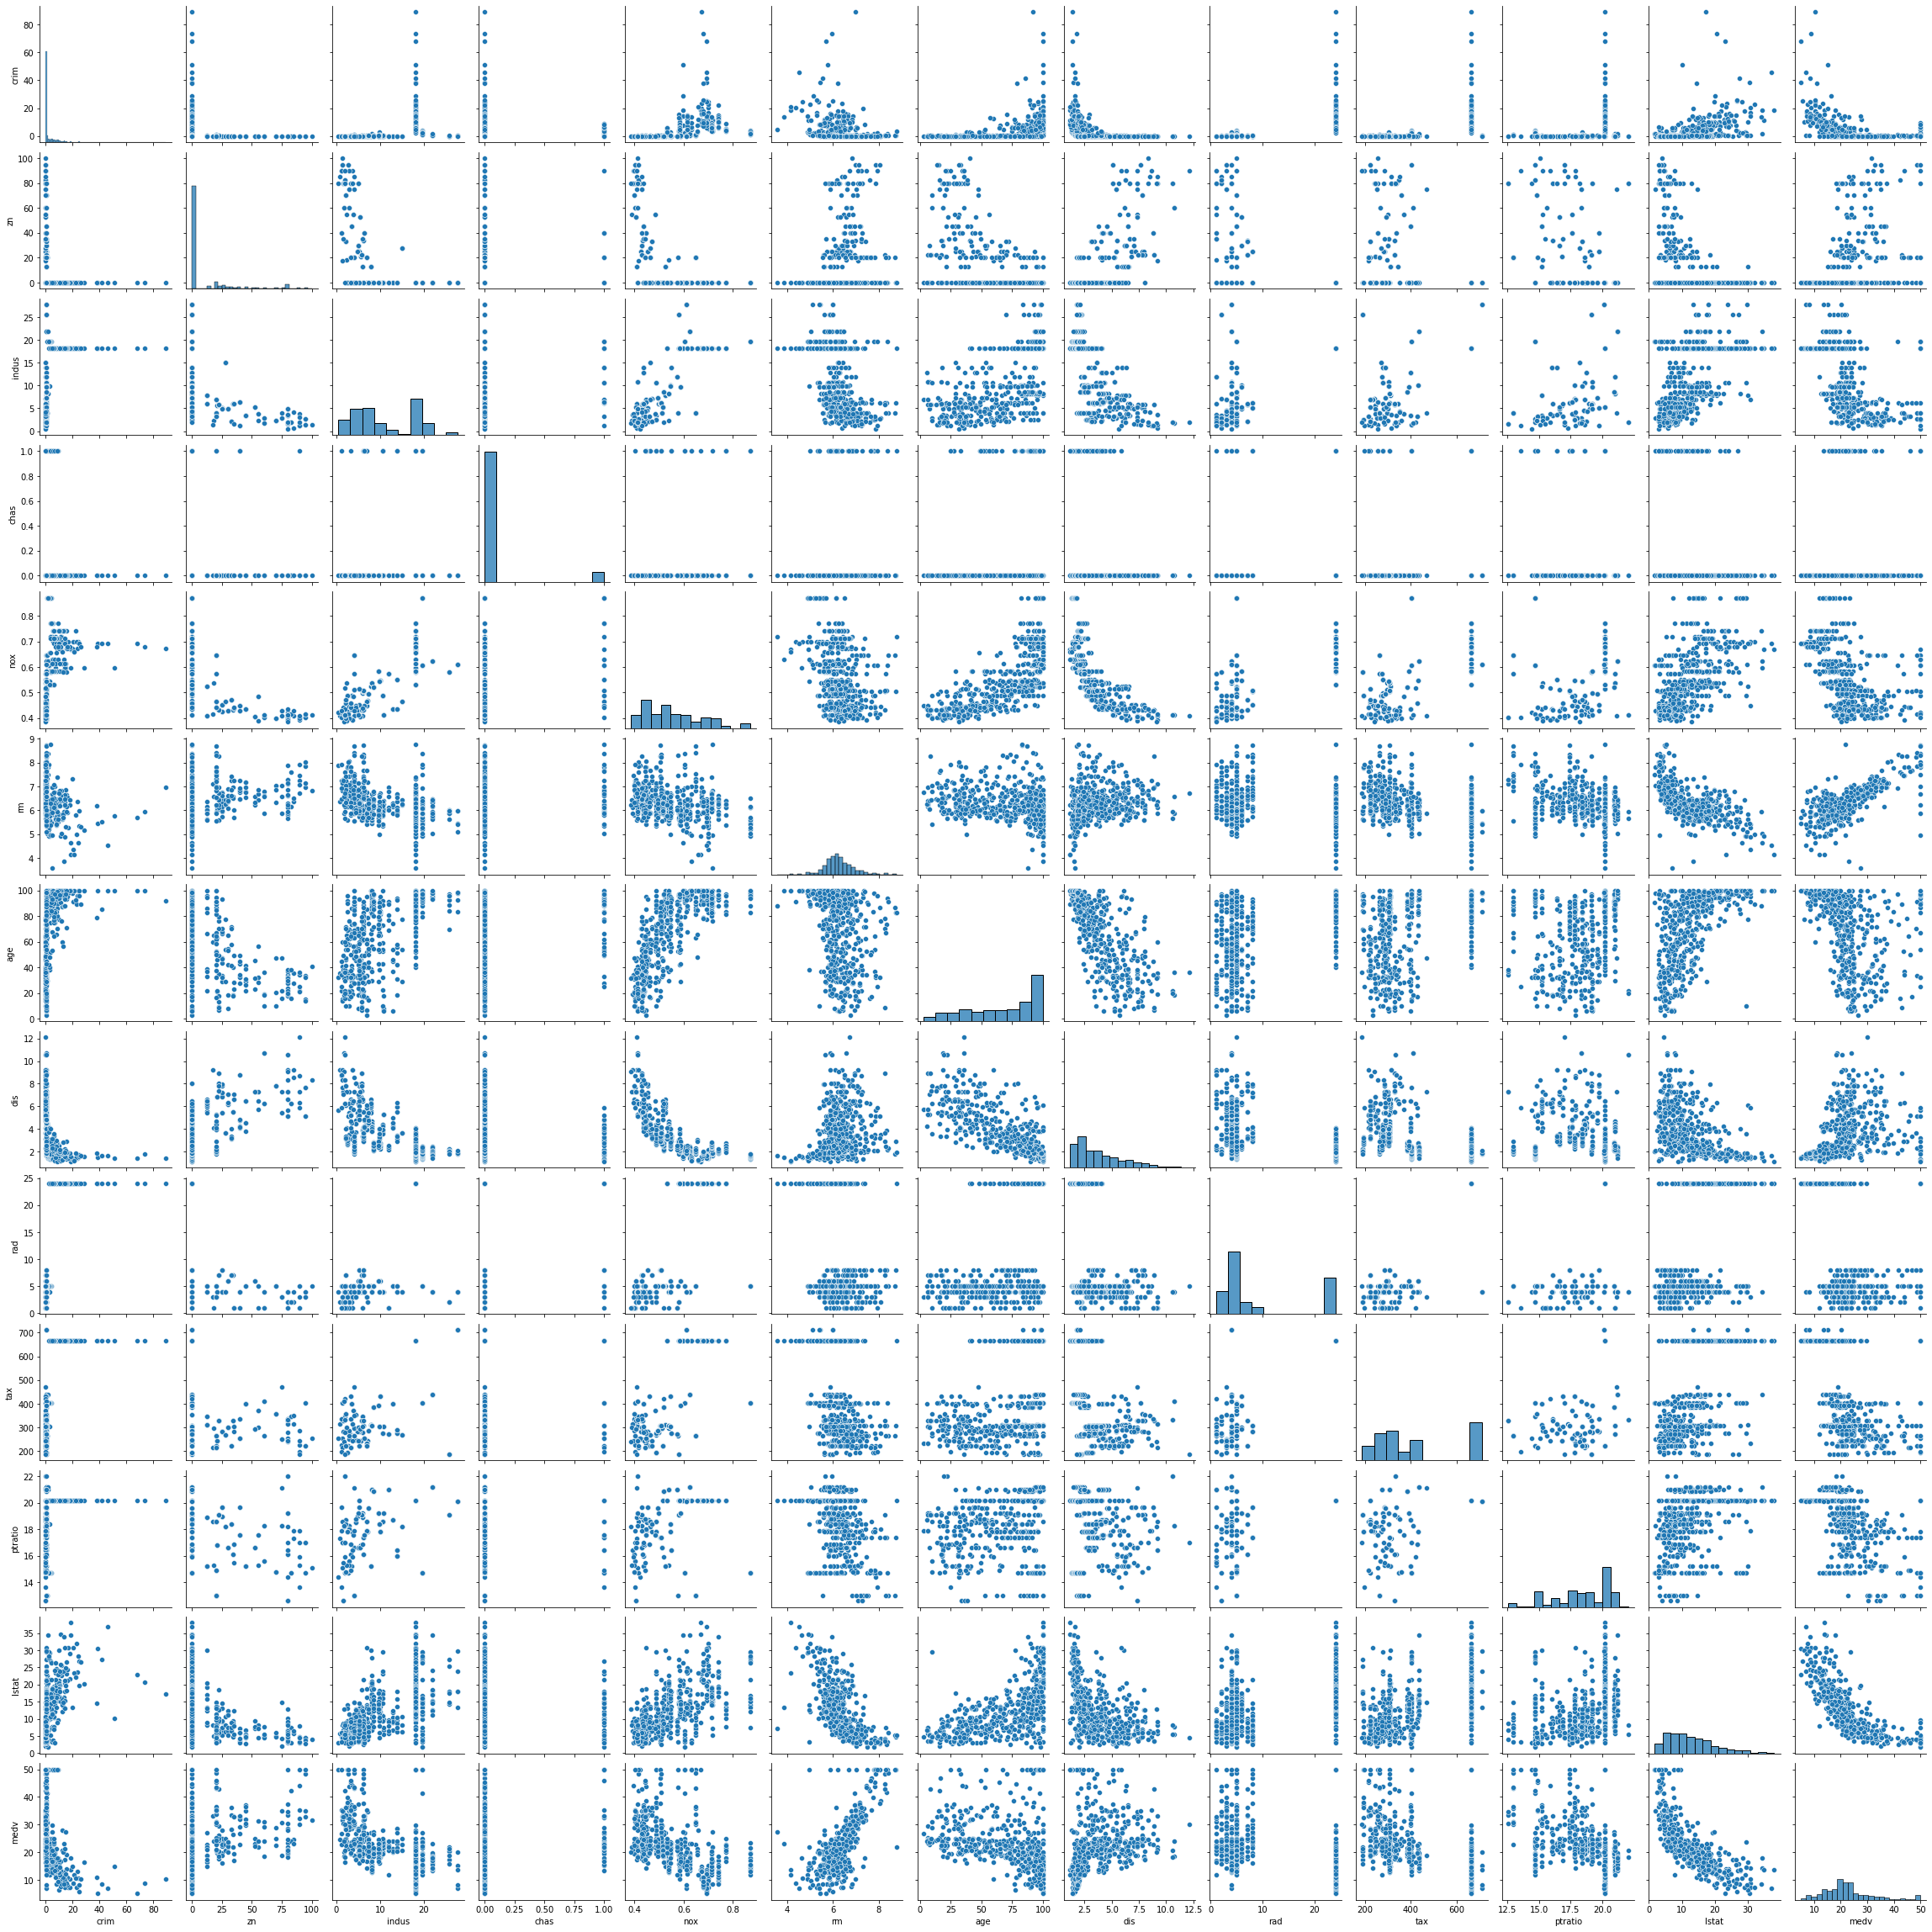

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


In [566]:
sns.pairplot(house)
plt.show()
house.corr()

There appears to be a strong linear relationship between `medv` and `rm`. Let's investigate this further and fit a simple linear regression between the two. 

We use the `scatterplot` function from the `seaborn` library to visualize the relationship between these two variables, and we use the `corr` function from the `pandas` library to calculate their correlation.

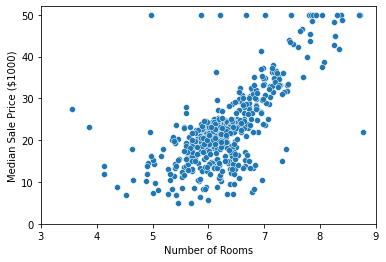

,rm,medv
rm,1.00000,0.69536
medv,0.69536,1.00000


In [567]:
house_slr = pd.DataFrame(house[['rm', 'medv']])
slr_plt1 = sns.scatterplot(x = 'rm', y = 'medv', data = house_slr)
slr_plt1.set(xlabel = 'Number of Rooms', ylabel = 'Median Sale Price ($1000)',
             xlim = (3,9), ylim = (0,52))
plt.show()
house_slr.corr()

## Simple Linear Regression

Next we fit a simple linear regression between these variables using the `ols` function from the `statsmodels` library. 

In [568]:
m_slr = smf.ols('medv ~ rm', data = house).fit()
m_slr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 11 Jun 2021   Prob (F-statistic):           2.49e-74
Time:                        18:03:09   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
rm             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let's plot the fitted regression line and its associated 95% confidence interval on top of the scatterplot of the data. We achieve this easily with the `regplot` function in the `seaborn` library. 

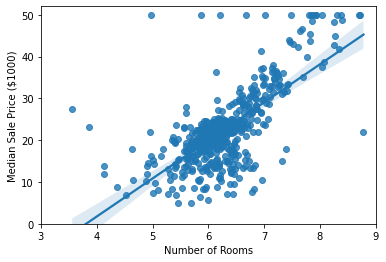

In [570]:
slr_plt2 = sns.regplot(x = 'rm', y = 'medv', data = house_slr)
slr_plt2.set(xlabel = 'Number of Rooms', ylabel = 'Median Sale Price ($1000)', 
             xlim = (3,9), ylim = (0, 52))
plt.show()

Note that we can achieve a similar effect using the `jointplot` function from `seaborn`. Note that without specifying `kind = 'reg'`, the resulting plot would not have included the regression line or the density estimates on the histograms.

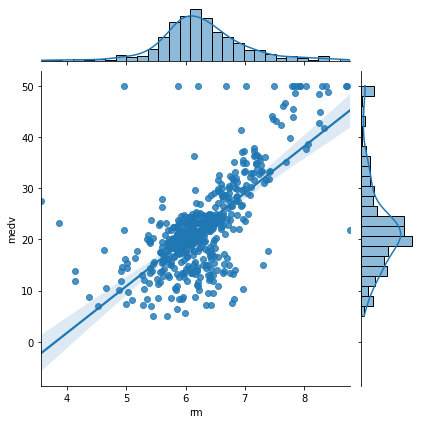

In [572]:
slr_plt3 = sns.jointplot(x = 'rm', y = 'medv', data = house_slr, kind = 'reg')
plt.show()

## Residual Analysis

Next we should check residual assumptions to evaluate whether inference with this model should be trusted. We do so with a variety of graphical residual diagnostics. We begin with residuals versus index.

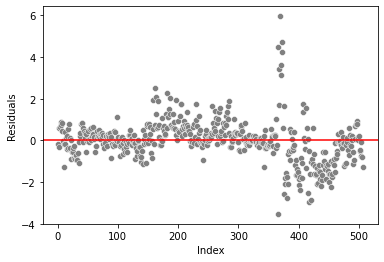

In [573]:
index = np.linspace(start = 1, stop = 506, num = 506)
resVindex = sns.scatterplot(x = index, y = m_slr.resid_pearson, color = "grey")
resVindex.set(xlabel = "Index", ylabel = "Residuals")
plt.axhline(0, color = "red")
plt.show()

Next we consider a scatterplot of residuals versus fitted values.

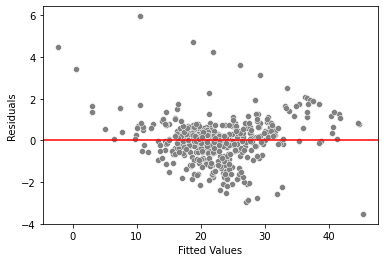

In [574]:
resVfit = sns.scatterplot(x = m_slr.fittedvalues, y = m_slr.resid_pearson, color = "grey")
resVfit.set(xlabel = "Fitted Values", ylabel = "Residuals")
plt.axhline(0, color = "red")
plt.show()

Next, a histogram of the residuals. Here we use the `histplot` function from `seaborn`.

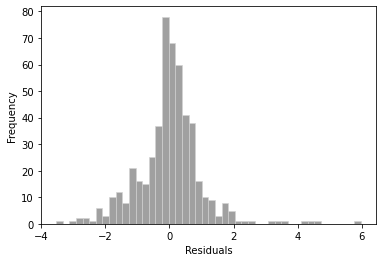

In [575]:
resHist = sns.histplot(m_slr.resid_pearson, color = "grey", edgecolor = "lightgrey")
resHist.set(xlabel = "Residuals", ylabel = "Frequency")
plt.show()

Next, a QQ-plot of the residuals. This is achieved with the `qqplot` function from `statsmodels` together with the normal distribution object `norm` from `scipy.stats`.

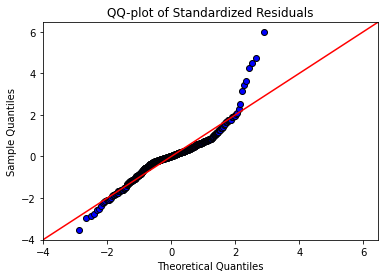

In [576]:
sm.qqplot(m_slr.resid_pearson, stats.norm, fit = True, line = '45', color = 'black')
plt.title("QQ-plot of Standardized Residuals")
plt.show()

These residuals don't seem very normal. Let's further investigate this using the Shapiro-Wilk test, which can be performed using the `shapiro` function from the `scipy.stats` library.

In [577]:
stats.shapiro(m_slr.resid_pearson)

ShapiroResult(statistic=0.920462965965271, pvalue=1.0877616166881038e-15)

## Influence Analysis

There seem to be a small number of unusually large residuals. Let's evaluate the influence of their corresponding observations using Cook's distance. These can be extracted from the `summary_table` associated with `statsmodels.stats.outliers_influence`.

In [581]:
table, body, names = summary_table(m_slr)

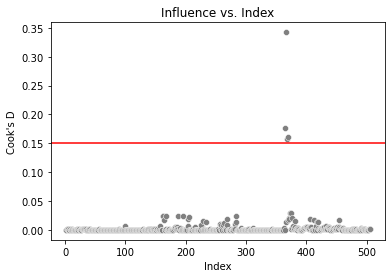

,rm,medv
364,8.780,21.9
365,3.561,27.5
367,3.863,23.1
368,4.970,50.0


In [582]:
cook_D = body[:,11]
influence = sns.scatterplot(x = index, y = cook_D, color = "grey")
influence.set(xlabel = "Index", ylabel = "Cook's D", title = "Influence vs. Index")
plt.axhline(0.15, color = "red")
plt.show()
house_slr.loc[cook_D > 0.15]

Neighbourhoods 364, 365, 367, 368 have a much larger influence on the fitted regression line than the other 502 neighbourhoods. The `rm` and `medv` values in the table above indicate why. These are the neighbourhoods with the smallest and largest average number of rooms and the largest median value. The summary statistics below substantiate this.

In [583]:
house_slr.describe()

,rm,medv
count,506.000000,506.000000
mean,6.284634,22.532806
std,0.702617,9.197104
min,3.561000,5.000000
25%,5.885500,17.025000
50%,6.208500,21.200000
75%,6.623500,25.000000
max,8.780000,50.000000


## Multiple Linear Regression

Now let's consider fitting a full multiple linear regression between `medv` and all of the covariates in the `boston` dataset.

In [584]:
m_mlr = smf.ols('medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + lstat', data = house).fit()
m_mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Fri, 11 Jun 2021   Prob (F-statistic):          2.23e-133
Time:                        18:06:22   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.6173      4.936      8.431      0.000      31.919      51.316
crim          -0.1214      0.033     -3.678      0.000      -0.186      -0.057
zn             0.0470      0.014      3.384      0.001       0.020       0.074
indus          0.0135      0.062      0.217      0.829      -0.109       0.136
chas           2.8400      0.870      3.264      0.001       1.131       4.549
nox          -18.7580      3.851     -4.870      0.000     -26.325     -11.191
rm             3.6581      0.420      8.705      0.000       2.832       4.484
age            0.0036      0.013      0.271      0.787      -0.023       0.030
dis           -1.4908      0.202     -7.394      0.000      -1.887      -1.095
rad            0.2894      0.067      4.325      0.000       0.158       0.421
tax           -0.0127      0.004     -3.337      0.001      -0.020      -0.005
ptratio       -0.9375      0.132     -7.091      0.000      -1.197      -0.678
lstat         -0.5520      0.051    -10.897      0.000      -0.652      -0.452
==============================================================================
Omnibus:                      171.096   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              709.937
Skew:                           1.477   Prob(JB):                    6.90e-155
Kurtosis:                       7.995   Cond. No.                     1.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The output above suggests that a more parsimonious model which excludes `indus` and `age` might be appropriate. Let's fit that reduced model and perform a partial F-test to compare the full and reduced models.

In [585]:
m_mlr_red = smf.ols('medv ~ crim + zn + chas + nox + rm + dis + rad + tax + ptratio + lstat', data = house).fit()
m_mlr_red.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     136.8
Date:                Fri, 11 Jun 2021   Prob (F-statistic):          1.73e-135
Time:                        18:06:34   Log-Likelihood:                -1505.0
No. Observations:                 506   AIC:                             3032.
Df Residuals:                     495   BIC:                             3078.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.4517      4.903      8.454      0.000      31.818      51.086
crim          -0.1217      0.033     -3.696      0.000      -0.186      -0.057
zn             0.0462      0.014      3.378      0.001       0.019       0.073
chas           2.8719      0.863      3.329      0.001       1.177       4.567
nox          -18.2624      3.565     -5.122      0.000     -25.267     -11.258
rm             3.6730      0.409      8.978      0.000       2.869       4.477
dis           -1.5160      0.188     -8.078      0.000      -1.885      -1.147
rad            0.2839      0.064      4.440      0.000       0.158       0.410
tax           -0.0123      0.003     -3.608      0.000      -0.019      -0.006
ptratio       -0.9310      0.130     -7.138      0.000      -1.187      -0.675
lstat         -0.5465      0.047    -11.519      0.000      -0.640      -0.453
==============================================================================
Omnibus:                      172.594   Durbin-Watson:                   1.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              725.971
Skew:                           1.486   Prob(JB):                    2.28e-158
Kurtosis:                       8.060   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [586]:
sm.stats.anova_lm(m_mlr_red, m_mlr)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,495.0,11352.186479,0.0,NaN,NaN,NaN
1,493.0,11349.418808,2.0,2.767671,0.060112,0.941666


The p-value above suggests that the reduced model may be preferable. We will carry on with this one. However, the warning in the summary output above suggests that multicollinearity might be an issue. Let's calculate some variance inflation factors and investigate this further.

## Multicollinearity

In [587]:
m_crim = smf.ols('crim ~ zn + nox + rm + dis + rad + tax + ptratio + lstat', data = house).fit()
m_zn = smf.ols('zn ~ crim +  nox + rm + dis + rad + tax + ptratio + lstat', data = house).fit()
m_nox = smf.ols('nox ~ crim + zn + rm + dis + rad + tax + ptratio + lstat', data = house).fit()
m_rm = smf.ols('rm ~ crim + zn + nox + dis + rad + tax + ptratio + lstat', data = house).fit()
m_dis = smf.ols('dis ~ crim + zn + nox + rm + rad + tax + ptratio + lstat', data = house).fit()
m_rad = smf.ols('rad ~ crim + zn + nox + rm + dis + tax + ptratio + lstat', data = house).fit()
m_tax = smf.ols('tax ~ crim + zn + nox + rm + dis + rad + ptratio + lstat', data = house).fit()
m_ptratio = smf.ols('ptratio ~ crim + zn + nox + rm + dis + rad + tax + lstat', data = house).fit()
m_lstat = smf.ols('lstat ~ crim + zn + nox + rm + dis + rad + tax + ptratio', data = house).fit()
VIF_crim = 1/(1-m_crim.rsquared)
VIF_zn = 1/(1-m_zn.rsquared)
VIF_nox = 1/(1-m_nox.rsquared)
VIF_rm = 1/(1-m_rm.rsquared)
VIF_dis = 1/(1-m_dis.rsquared)
VIF_rad = 1/(1-m_rad.rsquared)
VIF_tax = 1/(1-m_tax.rsquared)
VIF_ptratio = 1/(1-m_ptratio.rsquared)
VIF_lstat = 1/(1-m_lstat.rsquared)
pd.DataFrame({'crim': [VIF_crim], 'zn': [VIF_zn], 'nox': [VIF_nox], 'rm': [VIF_rm], 'dis': [VIF_dis], 'rad': [VIF_rad], 'tax': [VIF_tax], 'ptratio': [VIF_ptratio], 'lstat': [VIF_lstat]})

,crim,zn,nox,rm,dis,rad,tax,ptratio,lstat
0,1.758999,2.239098,3.73595,1.818073,3.427204,6.787442,7.204774,1.745409,2.522341


The VIFs calculated above indeed suggest the existence of multicollinearity. In particular, `tax` appears to be strongly related to the other covariates, and so we consider removing it from the model. Let's now re-calculate the VIFs with `tax` removed.

In [588]:
m_crim = smf.ols('crim ~ zn + nox + rm + dis + rad + ptratio + lstat', data = house).fit()
m_zn = smf.ols('zn ~ crim +  nox + rm + dis + rad + ptratio + lstat', data = house).fit()
m_nox = smf.ols('nox ~ crim + zn + rm + dis + rad + ptratio + lstat', data = house).fit()
m_rm = smf.ols('rm ~ crim + zn + nox + dis + rad + ptratio + lstat', data = house).fit()
m_dis = smf.ols('dis ~ crim + zn + nox + rm + rad + ptratio + lstat', data = house).fit()
m_rad = smf.ols('rad ~ crim + zn + nox + rm + dis + ptratio + lstat', data = house).fit()
m_ptratio = smf.ols('ptratio ~ crim + zn + nox + rm + dis + rad + lstat', data = house).fit()
m_lstat = smf.ols('lstat ~ crim + zn + nox + rm + dis + rad + ptratio', data = house).fit()
VIF_crim = 1/(1-m_crim.rsquared)
VIF_zn = 1/(1-m_zn.rsquared)
VIF_nox = 1/(1-m_nox.rsquared)
VIF_rm = 1/(1-m_rm.rsquared)
VIF_dis = 1/(1-m_dis.rsquared)
VIF_rad = 1/(1-m_rad.rsquared)
VIF_ptratio = 1/(1-m_ptratio.rsquared)
VIF_lstat = 1/(1-m_lstat.rsquared)
pd.DataFrame({'crim': [VIF_crim], 'zn': [VIF_zn], 'nox': [VIF_nox], 'rm': [VIF_rm], 'dis': [VIF_dis], 'rad': [VIF_rad], 'ptratio': [VIF_ptratio], 'lstat': [VIF_lstat]})

,crim,zn,nox,rm,dis,rad,ptratio,lstat
0,1.758208,2.153257,3.526181,1.790436,3.398388,2.700506,1.70183,2.517306


These look much better. Let us now move forward with the reduced model that not only excludes `indus` and `age`, but also `tax` as well.

In [589]:
m_mlr_final = smf.ols('medv ~ crim + zn + chas + nox + rm + dis + rad + ptratio + lstat', data = house).fit()
m_mlr_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     146.9
Date:                Fri, 11 Jun 2021   Prob (F-statistic):          8.23e-134
Time:                        18:07:27   Log-Likelihood:                -1511.5
No. Observations:                 506   AIC:                             3043.
Df Residuals:                     496   BIC:                             3085.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9841      4.945      8.085      0.000      30.268      49.700
crim          -0.1185      0.033     -3.559      0.000      -0.184      -0.053
zn             0.0366      0.014      2.695      0.007       0.010       0.063
chas           3.1394      0.870      3.610      0.000       1.431       4.848
nox          -21.3757      3.501     -6.106      0.000     -28.254     -14.497
rm             3.8506      0.411      9.368      0.000       3.043       4.658
dis           -1.4508      0.189     -7.674      0.000      -1.822      -1.079
rad            0.1046      0.041      2.569      0.010       0.025       0.185
ptratio       -1.0018      0.130     -7.677      0.000      -1.258      -0.745
lstat         -0.5535      0.048    -11.537      0.000      -0.648      -0.459
==============================================================================
Omnibus:                      160.486   Durbin-Watson:                   1.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              623.744
Skew:                           1.400   Prob(JB):                    3.59e-136
Kurtosis:                       7.663   Cond. No.                         774.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Residual Analysis

Next we should check residual assumptions to evaluate whether inference with this model should be trusted. We do so with a variety of graphical residual diagnostics. We begin with residuals versus index.

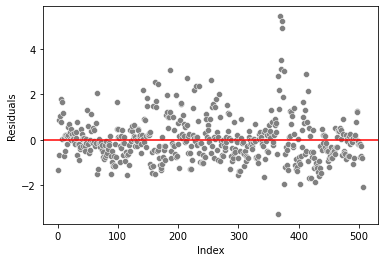

In [590]:
index = np.linspace(start = 1, stop = 506, num = 506)
resVindex = sns.scatterplot(x = index, y = m_mlr_final.resid_pearson, color = "grey")
resVindex.set(xlabel = "Index", ylabel = "Residuals")
plt.axhline(0, color = "red")
plt.show()

Next we consider a scatterplot of residuals versus fitted values.

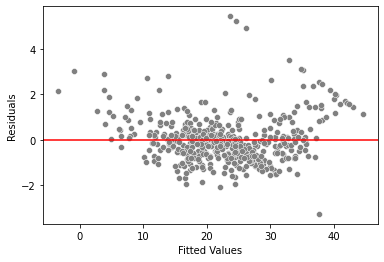

In [591]:
resVfit = sns.scatterplot(x = m_mlr_final.fittedvalues, 
                          y = m_mlr_final.resid_pearson, color = "grey")
resVfit.set(xlabel = "Fitted Values", ylabel = "Residuals")
plt.axhline(0, color = "red")
plt.show()

Next, a histogram of the residuals. Again, we use the `histplot` function from `seaborn`.

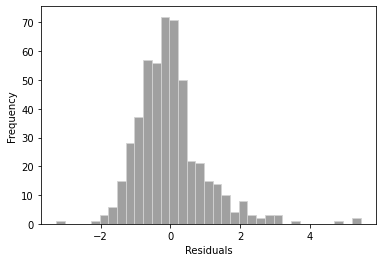

In [592]:
resHist = sns.histplot(m_mlr_final.resid_pearson, color = "grey", edgecolor = "lightgrey")
resHist.set(xlabel = "Residuals", ylabel = "Frequency")
plt.show()

Next, a QQ-plot of the residuals. This is achieved with the `qqplot` function from `statsmodels` together with the normal distribution object `norm` from `scipy.stats`.

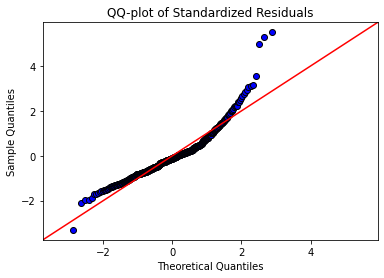

In [593]:
sm.qqplot(m_mlr_final.resid_pearson, stats.norm, fit = True, line = '45', color = 'black')
plt.title("QQ-plot of Standardized Residuals")
plt.show()

## Prediction

Using the reduced model, let us calculate a point prediction (and a 95% prediction interval) for the median house value in a neighborhood for which 
* `crim` = 5
* `zn` = 25
* `chas` = 0
* `nox` = 0.6
* `rm` = 3
* `dis` = 4
* `rad` = 10
* `ptratio` = 20 
* `lstat` = 5

In [594]:
pred = m_mlr_final.predict(exog = dict(crim=[5], zn=[25], chas=[0], nox=[0.6], rm=[3], dis=[4], rad=[10], ptratio=[20], lstat=[5]))
print("Prediction:", pred[0])
se, pi_lo, pi_hi = pi(m_mlr_final, exog = [1, 5, 25, 0, 0.6, 3, 4, 10, 20, 5], alpha = 0.05)
print("Lower 95% Prediction Limit:", pi_lo[0])
print("Upper 95% Prediction Limit:", pi_hi[0])

Prediction: 11.472210394518587
Lower 95% Prediction Limit: 1.4341151647601684
Upper 95% Prediction Limit: 21.510305624277006


Thus we predict the median house value in such a neighborhood to be 11,472.21, with a lower 95% prediction limit of 1,434.11 and an upper 95% prediction limit of 21,510.31.

# Logistic Regression

![caption](files/default.jpeg)

In this section we analyze the `Default` dataset from [An Introduction to Statistical Learning](https://www.statlearning.com/), which contains default records for 10,000 customers of a credit card company. In particular, we have customer-level information on each of the following variables.

* `default`: a binary variable indicating a customer's default status (coded as `Yes` or `No`)
* `student`: a binary variable indicating whether a customer is a student (coded as `Yes` or `No`)
* `balance`: a customer's average monthly credit card balance
* `income`: a customer's annual income

Interest lies in determining whether `balance`, `income`, and `student` status can be used to predict whether a customer defaults. 

## Preliminary Exploration

We begin by reading in the data and visually inspecting it.

In [595]:
default = pd.read_csv("default.csv")
default.head(10)

,default,student,balance,income
0,No,No,729.526495,44361.625070
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138950
3,No,No,529.250605,35704.493940
4,No,No,785.655883,38463.495880
5,No,Yes,919.588531,7491.558572
6,No,No,825.513331,24905.226580
7,No,Yes,808.667504,17600.451340
8,No,No,1161.057854,37468.529290
9,No,No,0.000000,29275.268290


In [596]:
default.tail(10)

,default,student,balance,income
9990,No,No,372.379238,25374.89909
9991,No,No,658.799558,54802.07822
9992,No,No,1111.647317,45490.68246
9993,No,No,938.836241,56633.44874
9994,No,Yes,172.412988,14955.94169
9995,No,No,711.555020,52992.37891
9996,No,No,757.962918,19660.72177
9997,No,No,845.411989,58636.15698
9998,No,No,1569.009053,36669.11236
9999,No,Yes,200.922183,16862.95232


In [597]:
default.describe(include = 'all')

,default,student,balance,income
count,10000,10000,10000.000000,10000.000000
unique,2,2,NaN,NaN
top,No,No,NaN,NaN
freq,9667,7056,NaN,NaN
mean,NaN,NaN,835.374886,33516.981876
std,NaN,NaN,483.714985,13336.639563
min,NaN,NaN,0.000000,771.967729
25%,NaN,NaN,481.731105,21340.462905
50%,NaN,NaN,823.636973,34552.644800
75%,NaN,NaN,1166.308387,43807.729275


Let's next visualize some of these variables and their relationships. We'll do so using the `boxplot` function, and the now familiar `scatterplot` function, both from `seaborn`. We will also use the `mosaic` function from `statsmodels`.

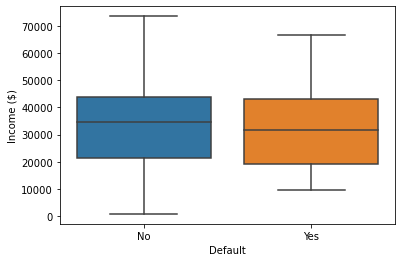

In [598]:
boxplt1 = sns.boxplot(x="default", y="income", data=default)
boxplt1.set(xlabel = "Default", ylabel = "Income ($)")
plt.show()

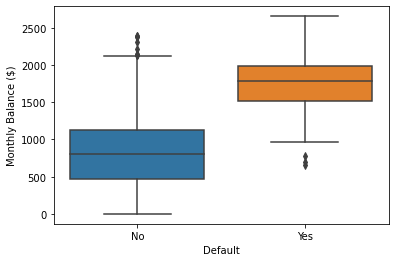

In [599]:
boxplt2 = sns.boxplot(x="default", y="balance", data=default)
boxplt2.set(xlabel = "Default", ylabel = "Monthly Balance ($)")
plt.show()

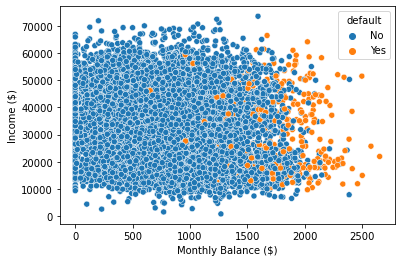

In [600]:
incVbalVdef = sns.scatterplot(x="balance", y="income", hue = "default", data=default)
incVbalVdef.set(xlabel = "Monthly Balance ($)", ylabel = "Income ($)")
plt.show()

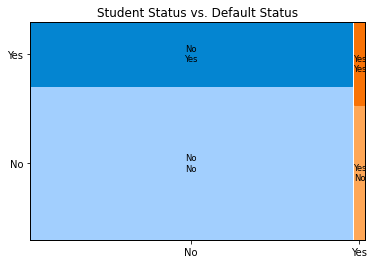

In [602]:
props = {}
props[('Yes', 'Yes')] = {'color': 'xkcd:orange'}
props[('Yes', 'No')] = {'color': 'xkcd:pale orange'}
props[('No','Yes')] = {'color': 'xkcd:cerulean'}
props[('No','No')] = {'color': 'xkcd:baby blue'}

mos = mosaic(default, ['default', 'student'], title = "Student Status vs. Default Status", properties = props)
plt.show()

## Model Fitting

We will use logistic regression for this classification task, treating `default` as the response variable. We will use the `Logit` function in the `statsmodels` library to do so. The arguments for this function, however, do not behave like those in the `ols` function we were dealing with previously. Here we submit the respond vector and covariate matrix separately. It's important to note that `Logit` is expecting a vector and matrix of numbers -- so any categorical data will need to be appropriately coded first. We do this below, recoding the `default` and `student` variables as binary indicators, where `Yes` corresponds to `1` and `No` corresponds to `0`. We achieve this using the `get_dummies` function from `pandas`.

In [603]:
default_ind = pd.get_dummies(default['default'])['Yes']
student_ind = pd.get_dummies(default['student'])['Yes']
default = default.drop(['default', 'student'], axis = 1)
default = pd.concat([default_ind, student_ind, default], axis = 1)
default.columns = ['default', 'student', 'balance', 'income']

Because the values in `income` and `balance` are quite large, they can become unweildy during model fitting. As such, we normalize those columns to have mean 0 and variance 1, as is shown below. The first 10 rows of the processed data are also shown.

In [604]:
default['balance'] = (default['balance'] - default['balance'].mean()) / default['balance'].std()
default['income'] = (default['income'] - default['income'].mean()) / default['income'].std()
default.head(10)

,default,student,balance,income
0,0,0,-0.218824,0.813147
1,0,1,-0.037614,-1.605415
2,0,0,0.492386,-0.131206
3,0,0,-0.632861,0.164023
4,0,0,-0.102786,0.370897
5,0,1,0.174098,-1.951423
6,0,0,-0.020387,-0.645722
7,0,1,-0.055213,-1.193444
8,0,0,0.673295,0.296293
9,0,0,-1.726998,-0.318050


Because we intend to perform classification, it's important to perform cross validation and compare in-sample to out-of-sample classification performance. We do this by randomly splitting the available data into training and testing sets using the `train_test_split` function from the `sklearn` library. Here we use 80% of the data for training, and 20% for testing.

In [631]:
random.seed(1)
X = default.drop(['default'], axis = 1)
y = default['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
train = pd.concat([y_train, X_train], axis = 1)
test = pd.concat([y_test, X_test], axis = 1)

Having preprocessed the data in this way, let's fit a logistic regression model.

In [632]:
m_logit = sm.Logit(y_train,  sm.add_constant(X_train)).fit()
m_logit.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 10


/Users/nstevens/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/nstevens/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7996
Method:                           MLE   Df Model:                            3
Date:                Fri, 11 Jun 2021   Pseudo R-squ.:                     inf
Time:                        18:20:18   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.9172      0.214    -27.624      0.000      -6.337      -5.497
student       -0.5360      0.264     -2.030      0.042      -1.054      -0.018
balance        2.7016      0.124     21.847      0.000       2.459       2.944
income         0.0695      0.122      0.568      0.570      -0.170       0.309
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

As can be seen above, the `income` covariate does not appear to be strongly associated with `default` status. We could therefore consider a reduced model which excludes it, but here we do not. We instead carry on with this model for purposes of classification.

## Classification

Having fit a logistic regression to these data, we now turn to the classification task. We aim to use the predicted probabilities of defaulting produced from our fitted model to classify whether a customer will or will not default. We begin with in-sample classification using only the training data.

In order to generate the predicted probabilities we use the `predict` function. We then threshold these predictions, transforming them into `0`'s and `1`'s. To summarize the classification performance, we tabulate the correct and incorrect classifications in a confusion matrix using the `confusion_matrix` function from `sklearn`.

In [633]:
train_label_pred = (m_logit.predict() >= 0.5)*1
train_label_true = train['default']
c=confusion_matrix(train_label_true, train_label_pred)
print(c)

[[7709   31]
 [ 185   75]]


This output is not very user-friendly. Here is a _slightly_ more informative depiction of the confusion matrix. For help making Markdown tables, consider using [this generator](https://www.tablesgenerator.com/markdown_tables).

|   |       |     | | Prediction        |
|---|-------|-----|-----------|--------|
|   |       |     | No        | Yes    |
|   | Truth | No  | 7695      | 34     |
|   |       | Yes | 184       | 87     |

We see that we tend to correctly classify non-defaulters, but we tend to misclassify defaulters. The accuracy, i.e., the overall correct classication rate, for these data is calculated below.

In [634]:
np.mean(train_label_true == train_label_pred)

0.973

Next, we perform out-of-sample classification using the held-out test data.

In [637]:
test_label_pred = (m_logit.predict(sm.add_constant(X_test)) >= 0.5)*1
test_label_true = test['default']
confusion_matrix(test_label_true, test_label_pred)

array([[1921,    6],
       [  46,   27]])

Again, this output is not very user-friendly. Here is a _slightly_ more informative depiction of the confusion matrix.

|   |       |     | | Prediction        |
|---|-------|-----|-----------|--------|
|   |       |     | No        | Yes    |
|   | Truth | No  | 1921      | 6     |
|   |       | Yes | 46        | 27     |

As with the in-sample classification we tend to correctly classify non-defaulters, but we tend to misclassify defaulters. However, the performance is slightly worse on the test data, as is to be expected. The accuracy for these data is calculated below.

In [638]:
np.mean(test_label_true == test_label_pred)

0.974

We may also summarize the classifier's performance using an ROC curve, which demonstrates the dependence of this performance on the chosen threshold. Note that we chose 0.5 for illustration above. 

We do this with the `plot_roc_curve` from `sklearn`, but in order to use it we need our logistic regression model to be an `sklearn` object, which it's not (we fit out model using `Logit` from `statsmodels`). As such, we must re-fit the model but with a different function from `sklearn`; that function is `LogisticRegression`.

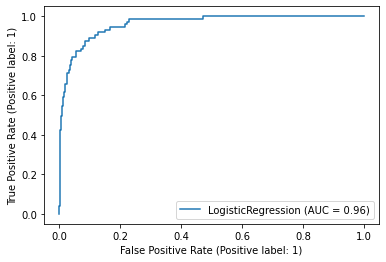

In [639]:
m_logit2 = LogisticRegression(fit_intercept=True, penalty = 'none').fit(X_train, y_train)
plot_roc_curve(estimator = m_logit2, X = X_test, y = y_test)
plt.show()

Note that `sklearn.metrics` provides access to a gamut of other classification performance scores such as:
* Accurary: `accuracy_score`
* Precision: `precision_score`
* Recall: `recall_score`
* F-score: `f1_score`
* [And many, many more](https://scikit-learn.org/stable/modules/model_evaluation.html)